# Códigos e exemplos numéricos da disciplina de Análise Numérica - 2024/01
- Prof. Felipe C. Minuzzi
- felipe.minuzzi@ufsm.br

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Método de Euler

In [21]:
#solução numérica de y' = y - t^2 +1, y(0) = 1/2
def euler(a,b,N,f,y0):
    dominio = np.linspace(a,b,N+1)
    h = (b-a)/N

    y_numerico = []
    y_numerico.append(y0)
    for i in range(1,len(dominio)):
        y_novo = y0 + h*f(dominio[i-1], y0)
        y_numerico.append(y_novo)
        y0 = y_novo
    return y_numerico, dominio

y_real     = lambda t: (t+1)**2 - 0.5*np.exp(t)
f          = lambda t,y: y - t**2 + 1
y_num, dom = euler(0,2,10,f,0.5)
yti        = y_real(dom)
error      = abs(y_num - yti)

print(f'|---- ti ---|---- yi ---|---- y(ti) ----|---- y(ti) - yi ---')
for i in range(len(y_num)):
    print(f'|--- {round(dom[i],5)} ---|--- {round(y_num[i],5)} ---|--- {round(yti[i],5)} ----|--- {round(error[i],5)} ---')



|---- ti ---|---- yi ---|---- y(ti) ----|---- y(ti) - yi ---
|--- 0.0 ---|--- 0.5 ---|--- 0.5 ----|--- 0.0 ---
|--- 0.2 ---|--- 0.8 ---|--- 0.8293 ----|--- 0.0293 ---
|--- 0.4 ---|--- 1.152 ---|--- 1.21409 ----|--- 0.06209 ---
|--- 0.6 ---|--- 1.5504 ---|--- 1.64894 ----|--- 0.09854 ---
|--- 0.8 ---|--- 1.98848 ---|--- 2.12723 ----|--- 0.13875 ---
|--- 1.0 ---|--- 2.45818 ---|--- 2.64086 ----|--- 0.18268 ---
|--- 1.2 ---|--- 2.94981 ---|--- 3.17994 ----|--- 0.23013 ---
|--- 1.4 ---|--- 3.45177 ---|--- 3.7324 ----|--- 0.28063 ---
|--- 1.6 ---|--- 3.95013 ---|--- 4.28348 ----|--- 0.33336 ---
|--- 1.8 ---|--- 4.42815 ---|--- 4.81518 ----|--- 0.38702 ---
|--- 2.0 ---|--- 4.86578 ---|--- 5.30547 ----|--- 0.43969 ---


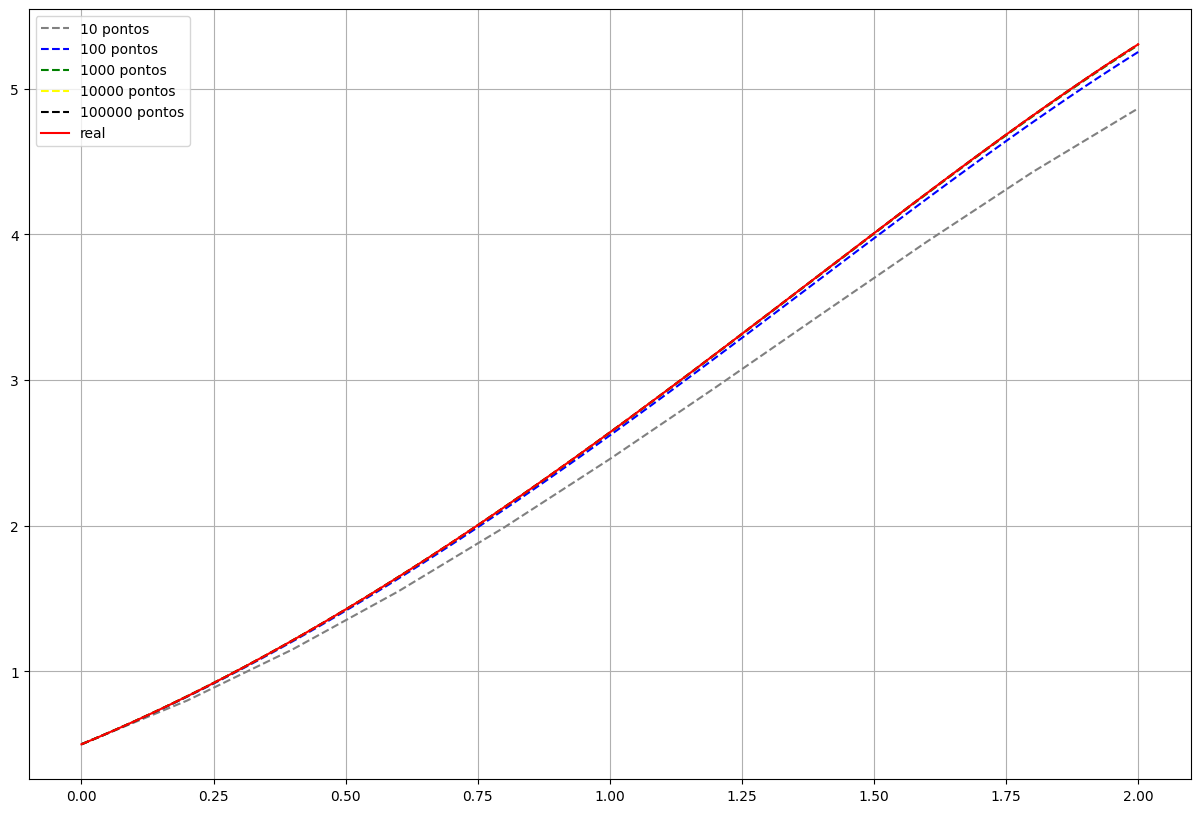

In [2]:
color_plot = ['gray','blue','green','yellow','black']
Ns         = [10,100,1000,10000,100000]
i          = 1

plt.figure(1,figsize = (15,10))
for n in Ns:
    y_num, dom = euler(0,2,n,f,0.5)
    yti        = y_real(dom)
    plt.plot(dom,y_num, '--', label=f'{n} pontos', color=color_plot[i-1])
    i += 1
plt.plot(dom,yti, 'r-', label = 'real')
plt.legend()
plt.grid()
plt.show()

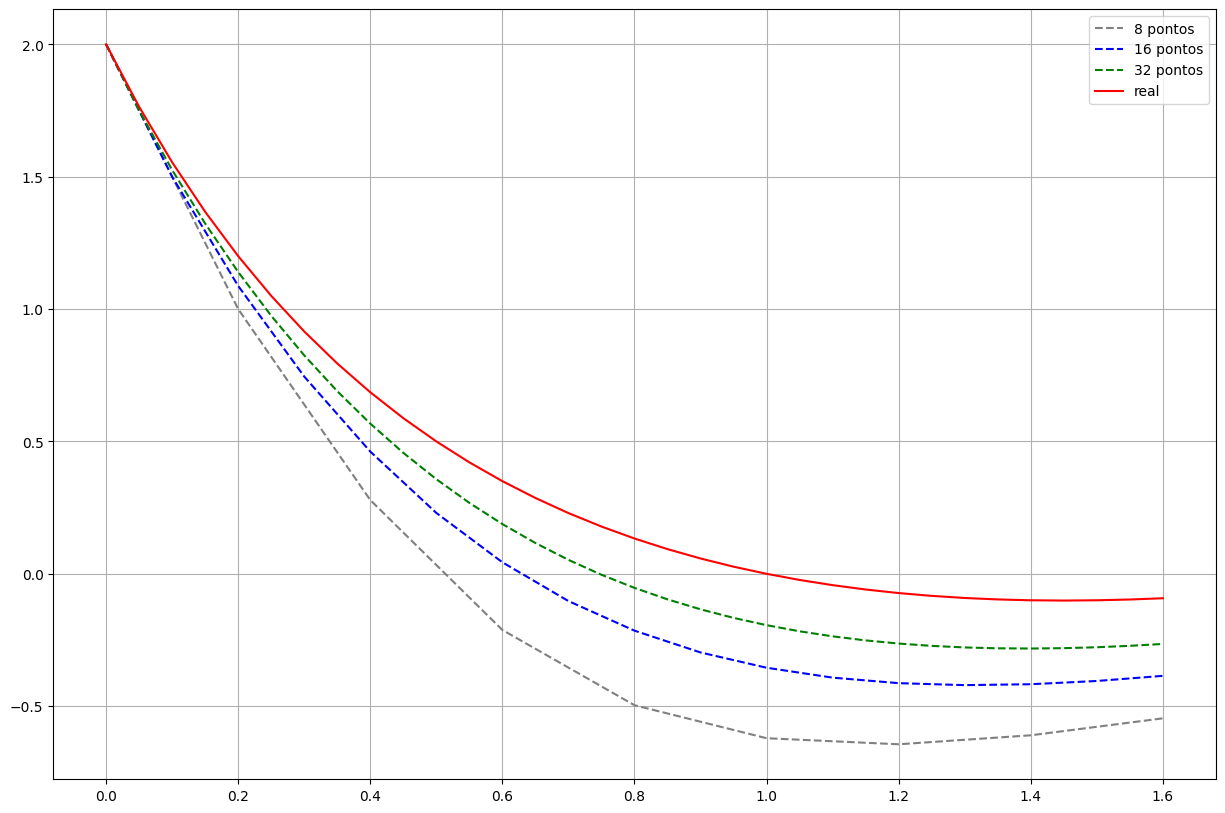

In [10]:
f = lambda x, y: y**2 - ((x**4 -6*x**3 +12*x**2 -14*x + 9 )/(1+x)**2)
y_real = lambda x: ((1 - x)*(2-x))/(1+x)
color_plot = ['gray','blue','green']
Ns         = [0.2,0.1,0.05]
i          = 1

plt.figure(1,figsize = (15,10))
for j in Ns:
    n = int((1.6)/j)
    y_num, dom = euler(0,1.6,n,f,2)
    yti        = y_real(dom)
    plt.plot(dom,y_num, '--', label=f'{n} pontos', color=color_plot[i-1])
    i += 1

plt.plot(dom,yti, 'r-', label = 'real')
plt.legend()
plt.grid()
plt.show()

## Métodos de Runge-Kutta

In [7]:
def euler_modificado(a,b,N,f,y0):
    dominio = np.linspace(a,b,N+1)
    h = (b-a)/N
    y_numerico = []
    y_numerico.append(y0)

    for i in range(1,len(dominio)):
        f_apli = f(dominio[i-1], y0)
        y_novo = y0 + (h/2)*(f_apli + f(dominio[i-1] + h, y0 + h*f_apli))
        y_numerico.append(y_novo)
        y0     = y_novo

    return y_numerico, dominio

In [18]:
#solução numérica de y' = y - t^2 +1, y(0) = 1/2 via Runge-Kutta de quarta ordem

def rk_FourthOrder(a,b,N,f,y0):
    dominio = np.linspace(a,b,N+1)
    h = (b-a)/N
    y_numerico = []
    y_numerico.append(y0)

    for i in range(1,len(dominio)):
        k1     = f(dominio[i-1], y0)
        k2     = f(dominio[i-1] + h/2, y0 + (h*k1)/2)
        k3     = f(dominio[i-1] + h/2, y0 + (h*k2)/2)
        k4     = f(dominio[i-1] + h, y0 + h*k3)
        y_novo = y0 + h/6*(k1 + 2*k2 + 2*k3 + k4)
        y_numerico.append(y_novo)
        y0     = y_novo

    return y_numerico, dominio

y_real     = lambda t: (t+1)**2 - 0.5*np.exp(t)
f          = lambda t,y: y - t**2 + 1
y_rk4, dom = rk_FourthOrder(0,2,10,f,0.5)
y_eum, dom = euler_modificado(0,2,10,f,0.5)
yti        = y_real(dom)
error_rk   = abs(y_rk4 - yti)
error_eum  = abs(y_eum - yti)

print(f'|---- ti ---|---- yi (RK 4 ordem) ---|---- yi (Euler mod) ---|---- y(ti) ----|---- erro - RK4 ---|---- erro - Euler mod ---')
for i in range(len(y_num)):
    print(f'|--- {round(dom[i],5)} ---|-------- {round(y_rk4[i],5)} -------| -------- {round(y_eum[i],5)} ------- |-------- {round(yti[i],5)} -------|-------- {round(error_rk[i],5)} -------|-------- {round(error_eum[i],5)} ---------')


|---- ti ---|---- yi (RK 4 ordem) ---|---- yi (Euler mod) ---|---- y(ti) ----|---- erro - RK4 ---|---- erro - Euler mod ---
|--- 0.0 ---|-------- 0.5 -------| -------- 0.5 ------- |-------- 0.5 -------|-------- 0.0 -------|-------- 0.0 ---------
|--- 0.2 ---|-------- 0.82929 -------| -------- 0.826 ------- |-------- 0.8293 -------|-------- 1e-05 -------|-------- 0.0033 ---------
|--- 0.4 ---|-------- 1.21408 -------| -------- 1.20692 ------- |-------- 1.21409 -------|-------- 1e-05 -------|-------- 0.00717 ---------
|--- 0.6 ---|-------- 1.64892 -------| -------- 1.63724 ------- |-------- 1.64894 -------|-------- 2e-05 -------|-------- 0.0117 ---------
|--- 0.8 ---|-------- 2.1272 -------| -------- 2.11024 ------- |-------- 2.12723 -------|-------- 3e-05 -------|-------- 0.01699 ---------
|--- 1.0 ---|-------- 2.64082 -------| -------- 2.61769 ------- |-------- 2.64086 -------|-------- 4e-05 -------|-------- 0.02317 ---------
|--- 1.2 ---|-------- 3.17989 -------| -------- 3.14958 ----

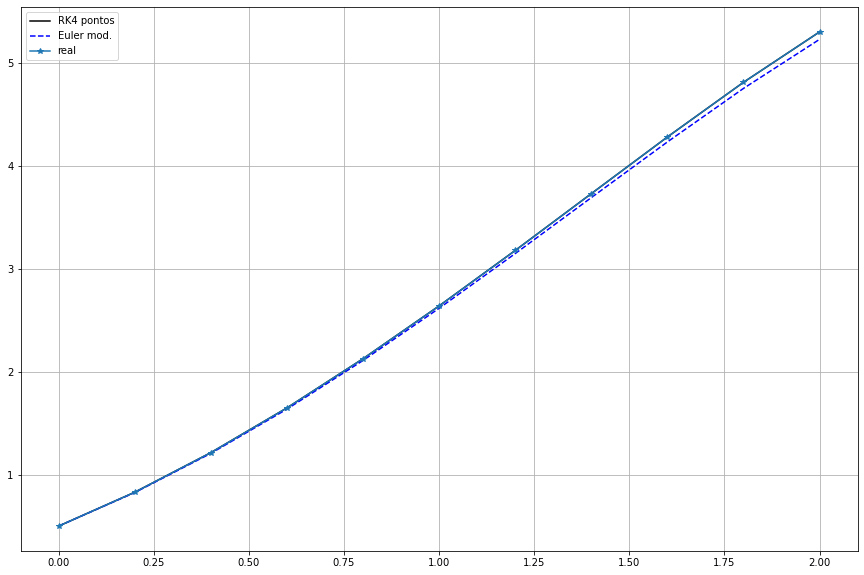

In [20]:
plt.figure(1,figsize = (15,10))
plt.plot(dom,y_rk4, '-', label='RK4 pontos', color='black')
plt.plot(dom,y_eum, '--', label='Euler mod.', color='blue')
plt.plot(dom,yti, '*-', label = 'real')
plt.legend()
plt.grid()
plt.show()

In [53]:
#comparações computacionais

y_real       = lambda t: (t+1)**2 - 0.5*np.exp(t)
f            = lambda t,y: y - t**2 + 1

h_euler      = 0.025
h_eumod      = 0.05
h_rk4        = 0.1

y_rk4, dom   = rk_FourthOrder(0,2,20,f,0.5)
y_eum, dom   = euler_modificado(0,2,40,f,0.5)
y_euler, dom = euler(0,2,80,f,0.5)
yti          = y_real(dom)

print(f'|---- ti ---|---------- Exato ---------|-------- yi (Euler) ------| ------ yi (Euler mod) -----|--- yi (RK 4 ordem) ----|')
print(f'|--- {round(dom[4],7)} ---|-------- {round(yti[4],7)} -------|-------- {round(y_euler[4],7)} -------| -------- {round(y_eum[2],7)} ------- |-------- {round(y_rk4[1],7)} -------|')
print(f'|--- {round(dom[8],7)} ---|-------- {round(yti[8],7)} -------|-------- {round(y_euler[8],7)} -------| -------- {round(y_eum[4],7)} ------- |-------- {round(y_rk4[2],7)} -------|')
print(f'|--- {round(dom[16],7)} ---|-------- {round(yti[16],7)} -------|-------- {round(y_euler[16],7)} -------| -------- {round(y_eum[8],7)} ------- |-------- {round(y_rk4[4],7)} -------|')
print(f'|--- {round(dom[32],7)} ---|-------- {round(yti[32],7)} -------|-------- {round(y_euler[32],7)} -------| -------- {round(y_eum[16],7)} ------- |-------- {round(y_rk4[8],7)} -------|')
print(f'|--- {round(dom[64],7)} ---|-------- {round(yti[64],7)} -------|-------- {round(y_euler[64],7)} -------| -------- {round(y_eum[32],7)} ------- |-------- {round(y_rk4[16],7)} -------|')


|---- ti ---|---------- Exato ---------|-------- yi (Euler) ------| ------ yi (Euler mod) -----|--- yi (RK 4 ordem) ----|
|--- 0.1 ---|-------- 0.6574145 -------|-------- 0.6554982 -------| -------- 0.6573085 ------- |-------- 0.6574144 -------|
|--- 0.2 ---|-------- 0.8292986 -------|-------- 0.8253385 -------| -------- 0.8290778 ------- |-------- 0.8292983 -------|
|--- 0.4 ---|-------- 1.2140877 -------|-------- 1.2056345 -------| -------- 1.2136079 ------- |-------- 1.2140869 -------|
|--- 0.8 ---|-------- 2.1272295 -------|-------- 2.1080276 -------| -------- 2.1260931 ------- |-------- 2.1272278 -------|
|--- 1.6 ---|-------- 4.2834838 -------|-------- 4.2353141 -------| -------- 4.2802567 ------- |-------- 4.283479 -------|
